<h2> 경기도 지역화폐 연령별 성별 이용현황 데이터 전처리 및 시각화 </h2>
<h3> [데이터 정보] </h3>
<ul>
  <li> 경기도 각 시군의 연령별 성별 지역화폐 이용 현황 </li>
  <li> 결제 취소 건수, 취소금액, 1회 평균 결제금액 : 선택제공항목으로 시군별로 제공 여부가 상이할 수 있음 </li>
  <li> 갱신주기 : 연간 </li>
  <li> 연령대가 기타인 경우 : 연령 및 성별이 확인되지 않은 지역화폐 결제 내역 </li>
  <li> 금액 데이터의 단위 : 원 </li>

<hr>

<h3> [데이터 검토] </h3>

In [565]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1.csv', encoding='euc-kr') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df1 = raw_df1.copy()

In [566]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(1537, 9)


In [567]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준연도      1537 non-null   int64  
 1   시군명       1537 non-null   object 
 2   연령대       1537 non-null   object 
 3   성별        1536 non-null   object 
 4   결제건수      1537 non-null   int64  
 5   결제금액      1537 non-null   int64  
 6   결제취소건수    1416 non-null   float64
 7   결제취소금액    1416 non-null   float64
 8   1회평균결제금액  1416 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 108.2+ KB
None


In [568]:
# 데이터 살펴보기
df1.head(10)

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
0,2023,가평군,10,남,8409,188845090,46.00,"4,871,840.00","22,457.00"
1,2023,가평군,10,여,6584,176605435,68.00,"1,841,390.00","26,823.00"
2,2023,가평군,20,남,70363,1545018255,728.00,"37,559,999.00","21,958.00"
3,2023,가평군,20,여,55118,1332506645,681.00,"27,996,349.00","24,176.00"
4,2023,가평군,30,남,110968,2682234965,"1,382.00","84,476,317.00","24,171.00"
5,2023,가평군,30,여,99493,2563403916,"1,230.00","54,207,827.00","25,765.00"
6,2023,가평군,40,남,167399,4188413440,"1,629.00","100,770,277.00","25,021.00"
7,2023,가평군,40,여,189169,4782432633,"1,909.00","77,437,079.00","25,281.00"
8,2023,가평군,50,남,190205,4879269120,"1,796.00","109,244,307.00","25,653.00"
9,2023,가평군,50,여,170268,4780308547,"1,587.00","83,345,676.00","28,075.00"


In [569]:
# 데이터의 결측치 확인
print(('데이터1의 결측치 : '))
df1.isnull().sum()

데이터1의 결측치 : 


기준연도          0
시군명           0
연령대           0
성별            1
결제건수          0
결제금액          0
결제취소건수      121
결제취소금액      121
1회평균결제금액    121
dtype: int64

-> 성별과 결제취소건수, 결제취소금액, 1회평균결제금액에 결측치가 있기는 하지만 각 개별 변수들을 살펴보면서 결측치 처리 예정

In [570]:
# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 데이터 요약 통계량 확인
df1.describe()

,기준연도,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
count,"1,537.00","1,537.00","1,537.00","1,416.00","1,416.00","1,416.00"
mean,"2,022.05","556,810.90","13,510,526,044.84","4,126.34","192,784,143.25","23,882.63"
std,0.80,"1,319,317.40","32,047,633,341.94","10,345.02","511,997,276.45","6,667.52"
min,"2,021.00",0.00,0.00,0.00,0.00,"9,500.00"
25%,"2,021.00","50,158.00","1,217,623,436.00",347.50,"14,949,535.00","19,505.75"
50%,"2,022.00","193,383.00","4,406,509,470.00","1,441.50","61,763,438.00","22,945.00"
75%,"2,023.00","588,580.00","13,272,831,107.00","4,094.00","168,813,100.50","26,593.75"
max,"2,023.00","17,524,460.00","416,427,980,547.00","128,058.00","8,114,899,177.00","96,746.00"


<hr>

<h3> [기준연도 변수 검토 및 전처리] </h3>

In [571]:
# 변수 타입 파악하기
df1['기준연도'].dtypes

dtype('int64')

In [572]:
# 빈도 구하기
df1['기준연도'].value_counts()

기준연도
2022    560
2023    524
2021    453
Name: count, dtype: int64

In [573]:
# 결측치 확인
df1['기준연도'].isna().sum()

0

-> 기준연도는 정수 타입이고 2021, 2022, 2023으로 구성된다는 것을 알 수 있음.

기준연도에 2021, 2022, 2023만 있고 다른 값은 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [시군명 변수 검토 및 전처리] </h3>

In [574]:
# 변수 타입 파악하기
df1['시군명'].dtypes 

dtype('O')

In [575]:
# 빈도 구하기
df1['시군명'].value_counts()

시군명
안양시     54
하남시     54
김포시     54
동두천시    54
의왕시     54
시흥시     54
과천시     53
광명시     53
광주시     53
파주시     53
의정부시    53
수원시     53
용인시     53
안성시     52
포천시     52
화성시     52
안산시     52
구리시     52
양주시     51
양평군     51
연천군     51
성남시     51
부천시     51
이천시     51
평택시     51
여주시     50
고양시     36
오산시     35
군포시     35
가평군     35
남양주시    34
Name: count, dtype: int64

In [576]:
# 시군명 종류
df1['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [577]:
# 시군명 개수
len(df1['시군명'].unique())

31

In [578]:
# 결측치 확인
df1['시군명'].isna().sum()

0

-> 시군명은 object 타입이고 총 31개의 시군명 종류를 가지고 있음.

기준연도에 결측치가 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [연령대 변수 검토 및 전처리] </h3>

In [579]:
# 변수 타입 파악하기
df1['연령대'].dtypes

dtype('O')

In [580]:
# 빈도 구하기
df1['연령대'].value_counts()

연령대
10           168
20           168
30           168
40           168
50           168
60           168
70           168
80           148
기타            81
전체 (기타포함)     34
80대이상         14
70대            8
60대            8
50대            8
40대            8
30대            8
20대            8
10대            8
10대미만          6
80이상           6
80대 이상         4
80대            2
90대            2
90             2
10대 미만         2
80세 이상         2
탈퇴회원           1
미분류            1
Name: count, dtype: int64

In [581]:
# 결측치 확인
df1['연령대'].isna().sum()

0

In [582]:
# 전체 (기타포함) 행의 인덱스
df1[df1['연령대'] == '전체 (기타포함)'].index

Index([ 541,  560,  578,  596,  614,  632,  650,  668,  686,  704,  722,  759,
        795,  813,  831,  849,  867,  885,  903,  921,  939,  957,  975,  993,
       1011, 1029, 1047, 1065, 1083, 1192, 1314, 1415, 1500, 1519],
      dtype='int64')

In [583]:
# 전체 (기타포함) 행 중 하나 확인
df1.iloc[541]

기준연도                 2022
시군명                   가평군
연령대             전체 (기타포함)
성별                     전체
결제건수              1489641
결제금액          38317308853
결제취소건수          15,109.00
결제취소금액     860,361,777.00
1회평균결제금액        25,723.00
Name: 541, dtype: object

전체 (기타포함) 의 경우 해당 시군의 데이터들의 합산 결과이므로 중복된 값이라고 볼 수 있음. 따라서 해당 행들은 제거해야 함.

In [584]:
# 전체 (기타포함) 행 제거하여 data1에 반영 
df1 = df1[df1['연령대'] != '전체 (기타포함)']
df1['연령대'].value_counts()

연령대
10        168
30        168
40        168
50        168
60        168
70        168
20        168
80        148
기타         81
80대이상      14
40대         8
70대         8
60대         8
50대         8
30대         8
20대         8
10대         8
10대미만       6
80이상        6
80대 이상      4
80대         2
90대         2
90          2
10대 미만      2
80세 이상      2
탈퇴회원        1
미분류         1
Name: count, dtype: int64

In [585]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(1503, 9)


-> 전체 (기타포함) 의 행들이 다 제거된 것을 확인할 수 있음.

In [586]:
# 연령대 통합
age_mapping = {
    '10' : '10대',
    '20' : '20대',
    '30' : '30대',
    '40' : '40대',
    '50' : '50대',
    '60' : '60대',
    '70' : '70대',
    '80' : '80대 이상',
    '기타' : '기타',
    '10대' : '10대',
    '20대' : '20대',
    '30대' : '30대',
    '40대' : '40대',
    '50대' : '50대',
    '60대' : '60대',
    '70대' : '70대',
    '80대이상' : '80대 이상',
    '10대미만' : '10대 미만',
    '80이상' : '80대 이상',
    '80대 이상' : '80대 이상',
    '80대' : '80대 이상',
    '90대' : '80대 이상',
    '90' : '80대 이상',
    '10대 미만' : '10대 미만',
    '80세 이상' : '80대 이상',
    '탈퇴회원' : '기타',
    '미분류' : '기타'
}

df1['연령대'] = df1['연령대'].replace(age_mapping)
df1['연령대'].value_counts()

연령대
80대 이상    180
10대       176
20대       176
30대       176
40대       176
50대       176
60대       176
70대       176
기타         83
10대 미만      8
Name: count, dtype: int64

10대 미만의 경우 다른 연령대에 비해 건수도 적고 미치는 영향도 크지 않음. 따라서 10대 미만의 행 제거.

In [587]:
# 10대 미만 행 제거하여 data1에 반영
df1 = df1[df1['연령대'] != '10대 미만']
df1['연령대'].value_counts()

연령대
80대 이상    180
10대       176
20대       176
30대       176
40대       176
50대       176
60대       176
70대       176
기타         83
Name: count, dtype: int64

In [588]:
# 기타 결측치 처리한 후 결측치 제거
df1['연령대'].replace(['기타'], np.nan, inplace=True)
df1.dropna(subset=['연령대'], inplace=True)

In [589]:
# 기타 제거되었는지 확인
df1['연령대'].value_counts()

연령대
80대 이상    180
10대       176
20대       176
30대       176
40대       176
50대       176
60대       176
70대       176
Name: count, dtype: int64

In [590]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(1412, 9)


-> 10대 미만의 행들이 제거된 것 확인 가능.

데이터의 특성상 연령대만으로는 어떤 연령대가 가장 지역화폐를 활발하게 사용하는지 알 수 없음. 따라서, 결제건수 및 결제금액 등과 같이 분석하여 결과를 도출해야 함.

<hr>

<h3> [성별 변수 검토 및 전처리] </h3>

In [591]:
# 변수 타입 파악하기
df1['성별'].dtypes

dtype('O')

In [592]:
# 빈도 구하기
df1['성별'].value_counts()

성별
남    706
여    706
Name: count, dtype: int64

In [593]:
# 결측치 확인
df1['성별'].isna().sum()

0

-> 결측치가 없으므로 전처리 하지 않음.

<hr>

<h3> [결제건수 변수 검토 및 전처리] </h3>

In [594]:
# 변수 타입 파악하기
df1['결제건수'].dtypes

dtype('int64')

결제건수는 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [595]:
# 요약 통계량 구하기
df1['결제건수'].describe()

count       1,412.00
mean      422,694.23
std       563,436.42
min           132.00
25%        52,472.25
50%       190,070.00
75%       565,874.25
max     3,472,658.00
Name: 결제건수, dtype: float64

-> 결제건수는 정수 타입이며 132~3,472,658건의 값을 가짐.<br>
약 52,382~564,943건에 가장 많이 분포하며, 평균은 약 422,211건, 중간값은 평균보다 작은 약 189,777건으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

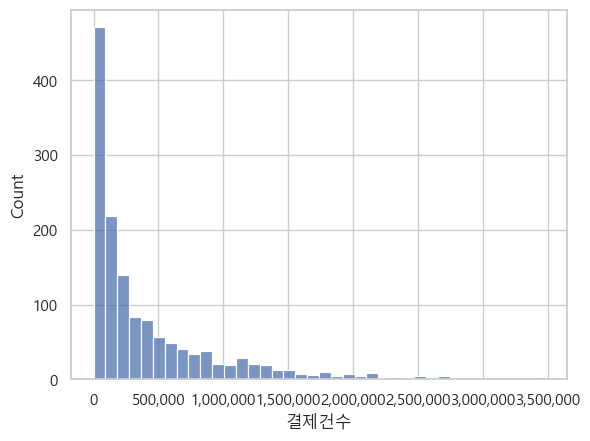

In [596]:
# 히스토그램으로 확인
import matplotlib.ticker as ticker
sns.histplot(data = df1, x='결제건수').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 0~500,000건 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

In [597]:
# 결측치 확인
df1['결제건수'].isna().sum()

0

-> 결제건수에 결측치가 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [결제금액 변수 검토 및 전처리] </h3>

In [598]:
# 변수 타입 파악하기
df1['결제금액'].dtypes

dtype('int64')

결제금액은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [599]:
# 요약 통계량 구하기
df1['결제금액'].describe()

count             1,412.00
mean     10,326,216,827.86
std      15,196,636,773.01
min           2,019,260.00
25%       1,256,623,065.00
50%       4,279,018,518.00
75%      12,951,759,615.50
max     101,648,000,000.00
Name: 결제금액, dtype: float64

-> 현재 금액 데이터의 단위는 '원'인데 출력 결과 숫자가 너무 큰 것을 확인할 수 있음. 따라서 결제금액의 단위를 '만원' 단위로 바꿈.

In [600]:
# 금액 데이터 단위 바꾸기
df1['결제금액'] = df1['결제금액'] / 10000

# 바뀐 데이터 확인
df1['결제금액'].describe()

count        1,412.00
mean     1,032,621.68
std      1,519,663.68
min            201.93
25%        125,662.31
50%        427,901.85
75%      1,295,175.96
max     10,164,800.00
Name: 결제금액, dtype: float64

-> 결제금액은 실수 타입이며 약 201~10,200,000만 원의 값을 가짐.<br>
약 125~1,294,181만 원에 가장 많이 분포하며, 평균은 약 1,031,423만 원, 중간값은 평균보다 작은 약 427,103만 원으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

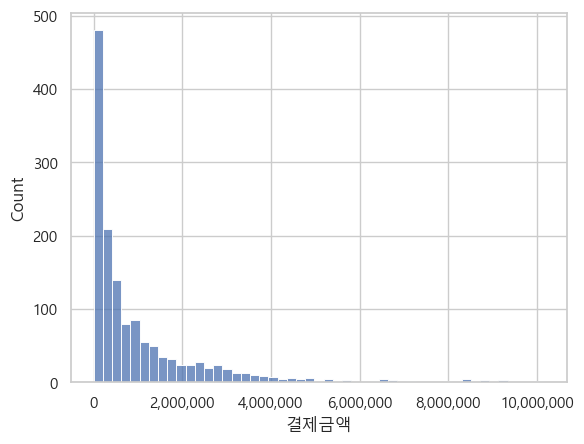

In [601]:
# 히스토그램으로 확인
sns.histplot(data = df1, x = '결제금액').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 0~2,000,000만 원 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

In [602]:
# 결측치 확인
df1['결제금액'].isna().sum()

0

-> 결제금액에 결측치가 없으므로 이상치나 결측 처리 과정은 건너뜀.

<hr>

<h3> [결제취소건수 변수 검토 및 전처리] </h3>

In [603]:
# 변수 타입 파악하기
df1['결제취소건수'].dtypes

dtype('float64')

In [604]:
# 결측치 확인
df1['결제취소건수'].isna().sum()

114

In [605]:
# 결측치 데이터의 시군명 확인 
df1[df1['결제취소건수'].isna()]['시군명'].drop_duplicates()

1155    김포시
1193    부천시
1261    안산시
1347    여주시
1434    이천시
1468    평택시
1501    하남시
Name: 시군명, dtype: object

-> 결제취소건수(취소금액, 1회 평균 결제금액)은 선택제공항목이므로 김포시, 부천시, 안산시, 여주시, 이천시, 평택시, 하남시는 해당 정보를 제공하지 않은 것을 확인할 수 있음.

In [606]:
# 결측치 제거
df1.dropna(subset=['결제취소건수'], inplace=True)

In [607]:
# 결측치 확인
df1['결제취소건수'].isna().sum()

0

-> 결측치가 모두 제거된 것을 확인할 수 있음.

결제취소건수는 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [608]:
# 요약 통계량 구하기
df1['결제취소건수'].describe()

count    1,298.00
mean     3,000.39
std      4,194.31
min          0.00
25%        349.75
50%      1,420.50
75%      3,880.75
max     30,178.00
Name: 결제취소건수, dtype: float64

-> 결제취소건수는 실수 타입이며 0~30,178건의 값을 가짐.<br>
약 348~3,880건에 가장 많이 분포하며, 평균은 약 2,997건, 중간값은 평균보다 작은 약 1,420건으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

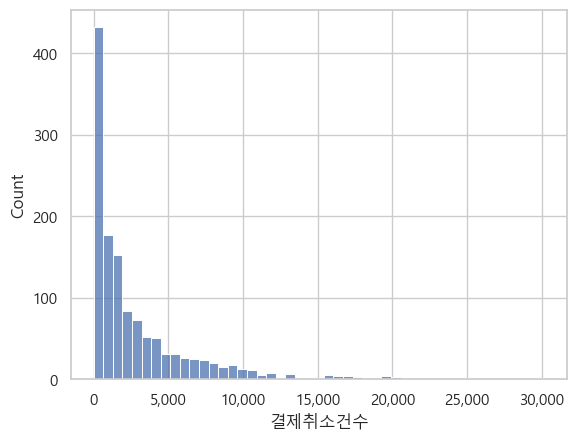

In [609]:
# 히스토그램으로 확인
import matplotlib.ticker as ticker
sns.histplot(data = df1, x='결제취소건수').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) ## 결제취소건수라고 수정 

-> 히스토그램을 보았을 때, 0~500,000건 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

<hr>

<h3> [결제취소금액 변수 검토 및 전처리] </h3>

In [610]:
# 변수 타입 파악하기
df1['결제취소금액'].dtypes

dtype('float64')

In [611]:
# 결측치 확인
df1['결제취소금액'].isna().sum()

0

결제취소금액은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [612]:
# 요약 통계량 구하기
df1['결제취소금액'].describe()

count           1,298.00
mean      141,457,075.23
std       216,102,471.42
min                 0.00
25%        15,102,445.25
50%        61,418,411.50
75%       162,133,441.25
max     1,488,864,774.00
Name: 결제취소금액, dtype: float64

-> 현재 금액 데이터의 단위는 '원'인데 출력 결과 숫자가 너무 큰 것을 확인할 수 있음. 따라서 결제취소금액의 단위를 '만원' 단위로 바꿈.

In [613]:
# 금액 데이터 단위 바꾸기
df1['결제취소금액'] = df1['결제취소금액'] / 10000

# 바뀐 데이터 확인
df1['결제취소금액'].describe()

count     1,298.00
mean     14,145.71
std      21,610.25
min           0.00
25%       1,510.24
50%       6,141.84
75%      16,213.34
max     148,886.48
Name: 결제취소금액, dtype: float64

-> 결제취소금액은 실수 타입이며 약 0~148,886만 원의 값을 가짐.<br>
약 1,501~16,211만 원에 가장 많이 분포하며, 평균은 약 14,129만 원, 중간값은 평균보다 작은 약 6,141만 원으로 전반적으로 낮은 값 쪽으로 치우쳐 있음.

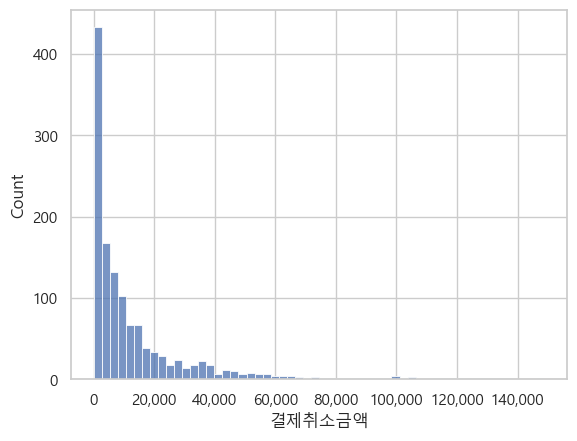

In [614]:
# 히스토그램으로 확인
sns.histplot(data = df1, x = '결제취소금액').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 0~20,000만 원 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

<hr>

<h3> [1회평균결제금액 변수 검토 및 전처리] </h3>

In [615]:
# 변수 타입 파악하기
df1['1회평균결제금액'].dtypes

dtype('float64')

In [616]:
# 결측치 확인
df1['1회평균결제금액'].isna().sum()

0

1회평균결제금액은 연속 변수이므로 df.value_counts()를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움. 따라서, df.describe()를 사용해서 특징 파악.

In [617]:
# 요약 통계량 구하기
df1['1회평균결제금액'].describe()

count    1,298.00
mean    23,672.55
std      5,978.47
min     11,191.00
25%     19,388.25
50%     22,922.50
75%     26,531.75
max     72,340.00
Name: 1회평균결제금액, dtype: float64

-> 1회평균결제금액의 경우 금액이 크지 않아 '원' 단위도 알아보기 편하지만, 앞에서 다른 금액 변수들의 단위를 모두 '만원'으로 변환했기 때문에 1회평균결제금액의 단위를 '만원' 단위로 바꿈.

In [618]:
# 금액 데이터 단위 바꾸기
df1['1회평균결제금액'] = df1['1회평균결제금액'] / 10000

# 바뀐 데이터 확인
df1['1회평균결제금액'].describe()

count   1,298.00
mean        2.37
std         0.60
min         1.12
25%         1.94
50%         2.29
75%         2.65
max         7.23
Name: 1회평균결제금액, dtype: float64

-> 1회평균결제금액은 실수 타입이며 약 1.12~7.23만 원의 값을 가짐.<br>
약 1.94~2.65만 원에 가장 많이 분포하며, 평균은 약 2.37만 원, 중간값은 평균보다 작은 약 2.29만 원으로 약간 낮은 값 쪽으로 치우쳐 있음.

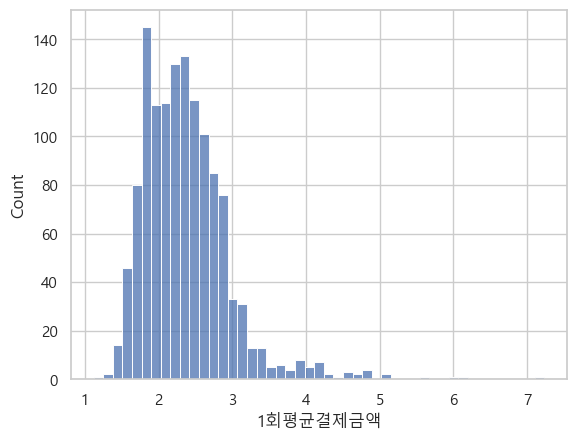

In [619]:
# 히스토그램으로 확인
sns.histplot(data = df1, x = '1회평균결제금액').xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

-> 히스토그램을 보았을 때, 2~3만 원 사이에 가장 많이 분포하고 있는 것을 확인할 수 있음.

<hr>

<h3> [데이터 전처리 후 데이터 검토] </h3>

In [620]:
# 데이터의 행, 열 개수 출력
print('데이터 전처리 후 데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터 전처리 후 데이터1의 행, 열 개수 : 
(1298, 9)


In [621]:
# 데이터 살펴보기
df1.head(10)

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42
5,2023,가평군,30대,여,99493,"256,340.39","1,230.00","5,420.78",2.58
6,2023,가평군,40대,남,167399,"418,841.34","1,629.00","10,077.03",2.50
7,2023,가평군,40대,여,189169,"478,243.26","1,909.00","7,743.71",2.53
8,2023,가평군,50대,남,190205,"487,926.91","1,796.00","10,924.43",2.57
9,2023,가평군,50대,여,170268,"478,030.85","1,587.00","8,334.57",2.81


In [622]:
# 데이터의 결측치 확인
print(('데이터 전처리 후 데이터1의 결측치 : '))
df1.isnull().sum()

데이터 전처리 후 데이터1의 결측치 : 


기준연도        0
시군명         0
연령대         0
성별          0
결제건수        0
결제금액        0
결제취소건수      0
결제취소금액      0
1회평균결제금액    0
dtype: int64

In [623]:
# 데이터 요약 통계량 확인
df1.describe()

,기준연도,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
count,"1,298.00","1,298.00","1,298.00","1,298.00","1,298.00","1,298.00"
mean,"2,022.15","409,845.07","1,010,302.17","3,000.39","14,145.71",2.37
std,0.77,"552,025.71","1,511,124.07","4,194.31","21,610.25",0.60
min,"2,021.00",283.00,"1,150.68",0.00,0.00,1.12
25%,"2,022.00","51,724.00","122,246.80",349.75,"1,510.24",1.94
50%,"2,022.00","185,704.00","423,850.22","1,420.50","6,141.84",2.29
75%,"2,023.00","545,082.50","1,230,953.89","3,880.75","16,213.34",2.65
max,"2,023.00","3,472,658.00","10,164,800.00","30,178.00","148,886.48",7.23


<hr>

<h3> [시각화] </h3>

   기준연도  시군명  연령대 성별    결제건수       결제금액   결제취소건수   결제취소금액  1회평균결제금액
0  2023  가평군  10대  남    8409  18,884.51    46.00   487.18      2.25
1  2023  가평군  10대  여    6584  17,660.54    68.00   184.14      2.68
2  2023  가평군  20대  남   70363 154,501.83   728.00 3,756.00      2.20
3  2023  가평군  20대  여   55118 133,250.66   681.00 2,799.63      2.42
4  2023  가평군  30대  남  110968 268,223.50 1,382.00 8,447.63      2.42


C:\Users\윤재희\AppData\Local\Temp\ipykernel_31800\957158809.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='연령대', y='결제건수', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


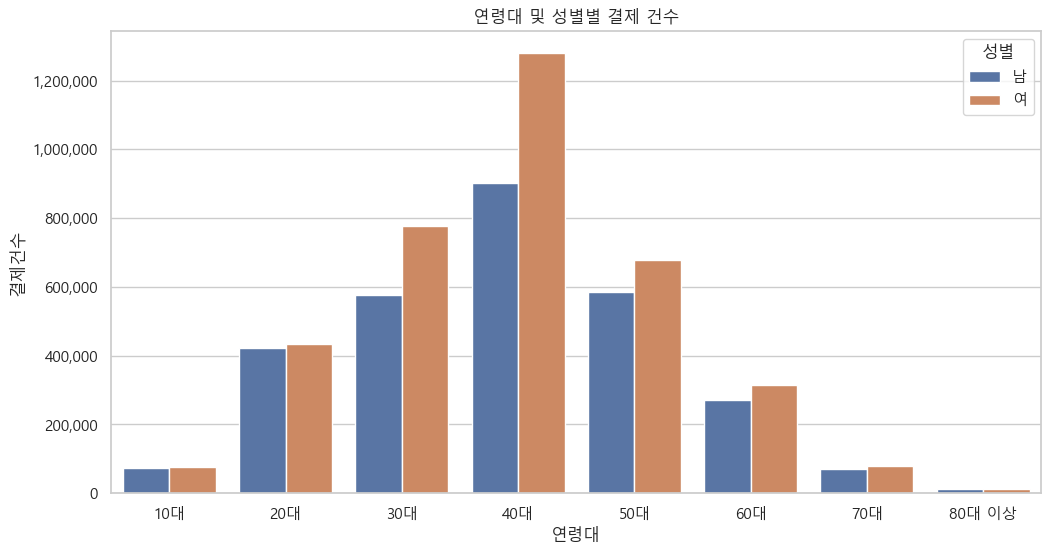

In [637]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams.update({'font.family': 'Malgun Gothic'})

# 데이터 확인
print(df1.head())

# 1. 연령대 및 성별별 결제 건수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='연령대', y='결제건수', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('연령대 및 성별별 결제 건수')
plt.show()

C:\Users\윤재희\AppData\Local\Temp\ipykernel_31800\4000202724.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='연령대', y='결제금액', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


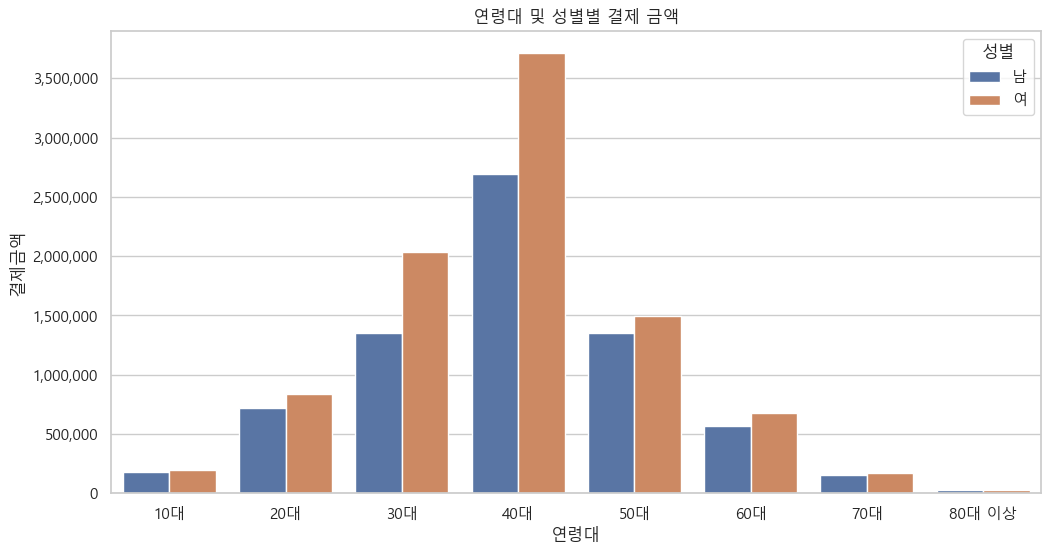

In [638]:
# 2. 연령대 및 성별별 결제 금액 시각화

plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='연령대', y='결제금액', hue='성별', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('연령대 및 성별별 결제 금액')
plt.show()

***시군별 성별 연령대

In [648]:
a = df1[df1.groupby('시군명')['성별'].sum()]
plt.figure(figsize=(14, 8))
sns.barplot(data=a, x='시군명', y='결제건수', ci=None)
plt.title('지역별 성별 결제 건수')
plt.xticks(rotation=90)
plt.show()

KeyError: "None of [Index(['남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여', '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여', '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여',\n       '남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여'],\n      dtype='object')] are in the [columns]"

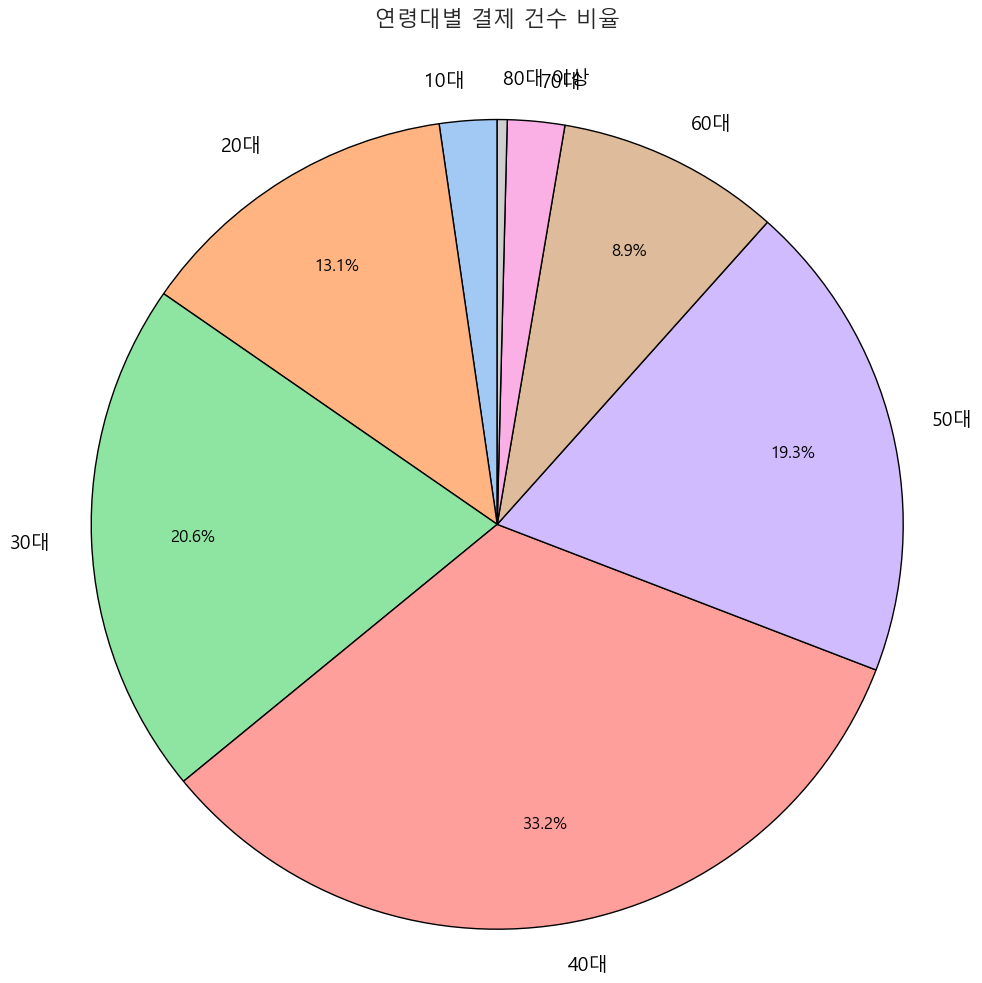

In [626]:
# 연령대별 결제 건수 비율
age_counts = df1.groupby('연령대')['결제건수'].sum()

# 색상 팔레트 설정
colors = sns.color_palette('pastel', len(age_counts))

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    age_counts, 
    labels=age_counts.index, 
    autopct=lambda p: f'{p:.1f}%' if p > 3 else '',  # 작은 비율은 텍스트 표시하지 않음
    startangle=90, 
    colors=colors,
    pctdistance=0.75,  # 비율 텍스트 위치 조정
    labeldistance=1.1,  # 라벨의 위치를 원 밖으로 이동
    wedgeprops={'edgecolor': 'black'}  # 경계선 추가
)

# 텍스트 설정
for text in texts:
    # if text.get_text() == '70대' or '80 이상' or '기타':   ## 나이 기준 글자 겹쳐지는거 어케하나요 ,,,, ???????????
    #    text.set_size(8)  # 작은 크기로 설정
    #    text.set_color('gray')  # 라벨 색상을 회색으로
    # else:
        text.set_size(14)  # 다른 라벨은 큰 크기로 설정
        text.set_color('black')  # 다른 라벨의 색상을 검은색으로
for autotext in autotexts:
    autotext.set_size(12)
    autotext.set_color('black')  # 비율 텍스트의 색상을 흰색으로 변경

plt.title('연령대별 결제 건수 비율', fontsize=16, pad=40)
plt.axis('equal')  # 원을 동그랗게 표현
plt.tight_layout()  # 레이아웃 조정
plt.show()

C:\Users\윤재희\AppData\Local\Temp\ipykernel_31800\2956267407.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Forty, x='시군명', y='결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


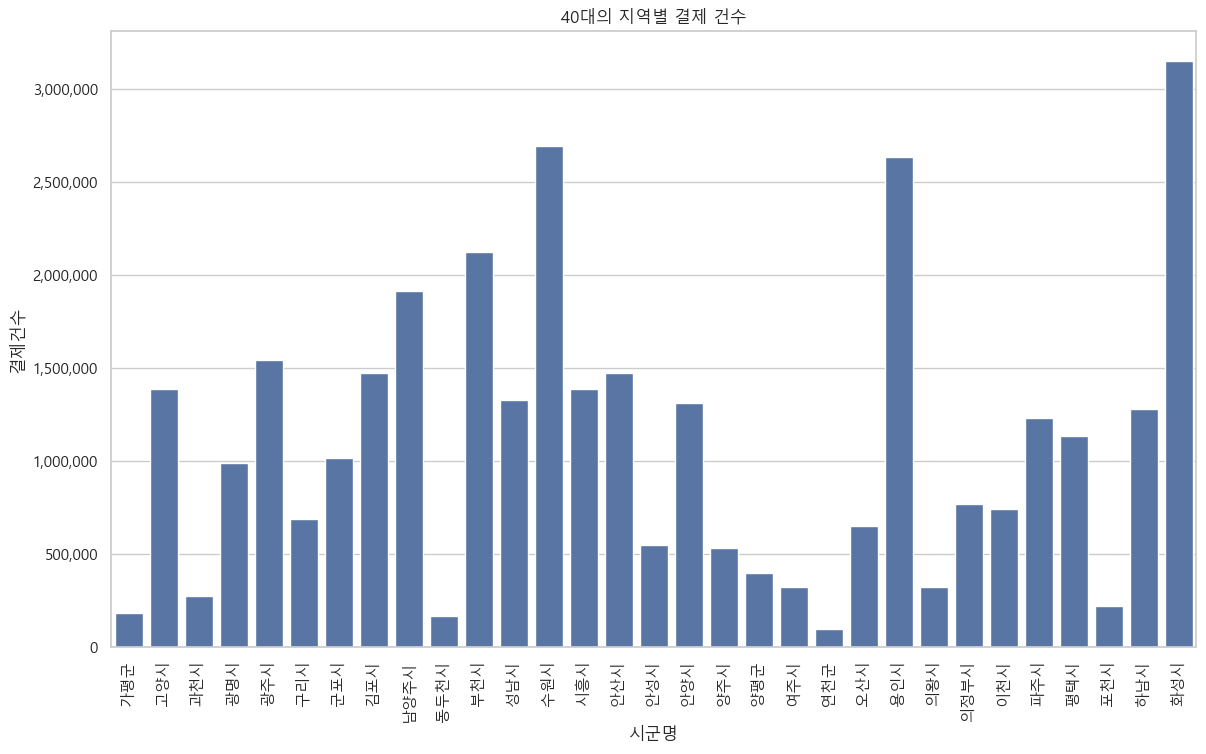

In [639]:
Forty = df1[df1['연령대'] == '40대']

plt.figure(figsize=(14, 8))
sns.barplot(data=Forty, x='시군명', y='결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('40대의 지역별 결제 건수')
plt.xticks(rotation=90)
plt.show()

C:\Users\윤재희\AppData\Local\Temp\ipykernel_31800\2492319531.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='시군명', y='결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


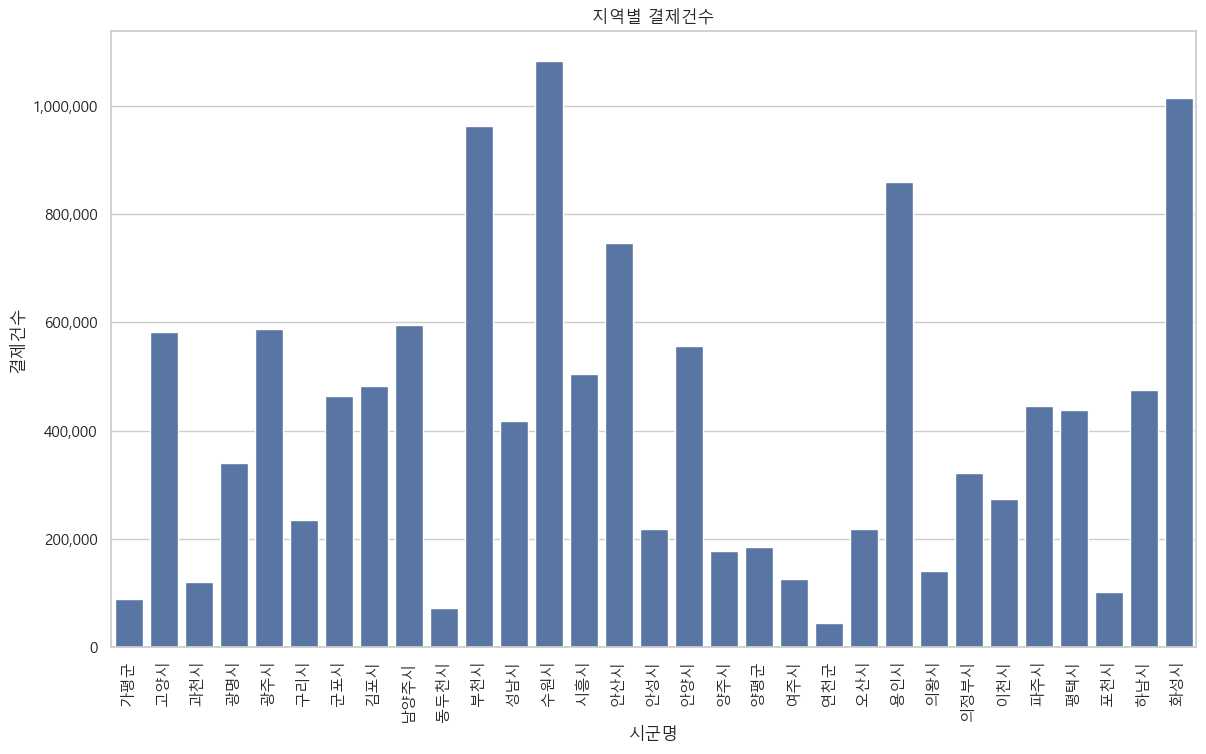

In [640]:
# 지역별 결제건수 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df1, x='시군명', y='결제건수', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('지역별 결제건수')
plt.xticks(rotation=90)
plt.show()

C:\Users\윤재희\AppData\Local\Temp\ipykernel_31800\4202121294.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='시군명', y='1회평균결제금액', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


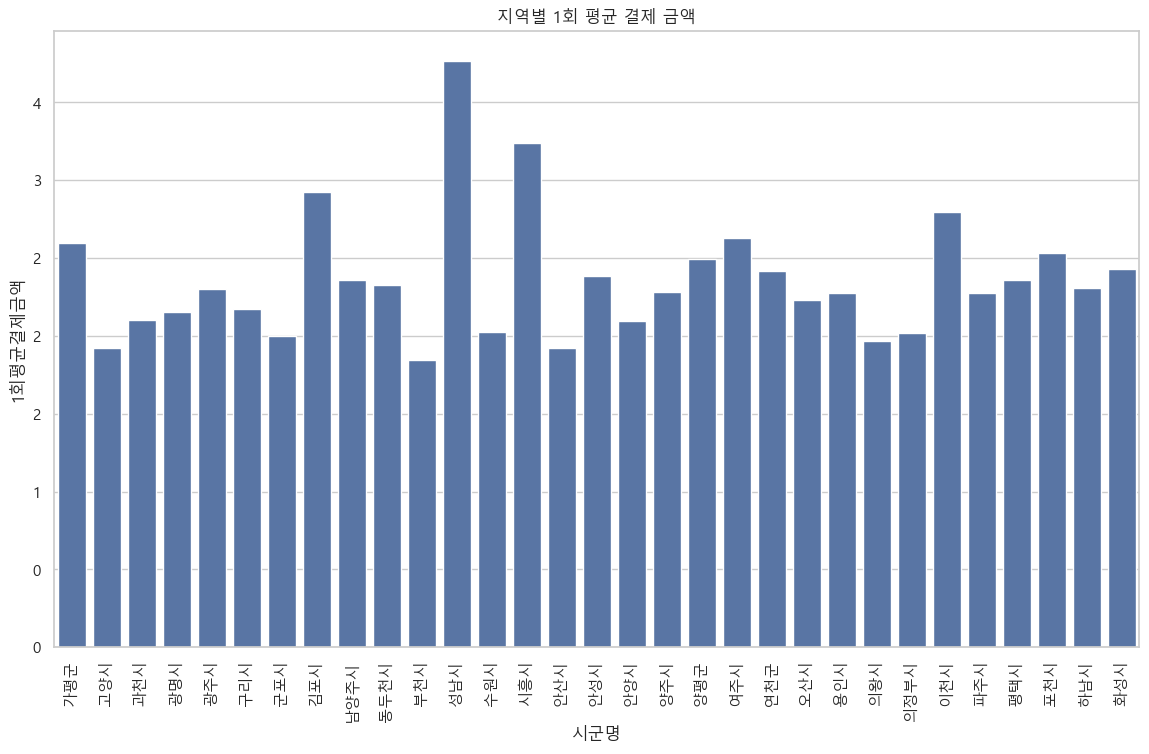

In [641]:
# 3. 지역별 평균 결제 금액 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df1, x='시군명', y='1회평균결제금액', ci=None).yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('지역별 1회 평균 결제 금액')
plt.xticks(rotation=90)
plt.show()

C:\Users\윤재희\AppData\Local\Temp\ipykernel_31800\1100372545.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='시군명', y='결제취소건수', ci=None)


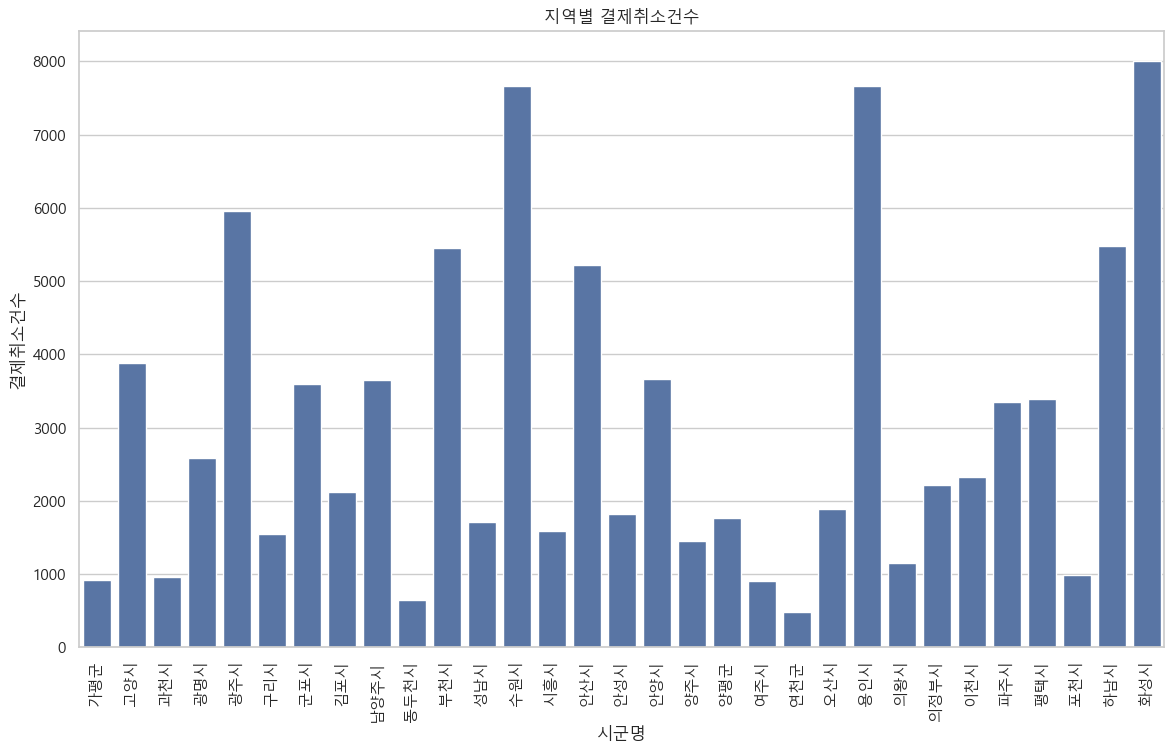

In [630]:
# 지역별 결제취소건수 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df1, x='시군명', y='결제취소건수', ci=None)
plt.title('지역별 결제취소건수')
plt.xticks(rotation=90)
plt.show()

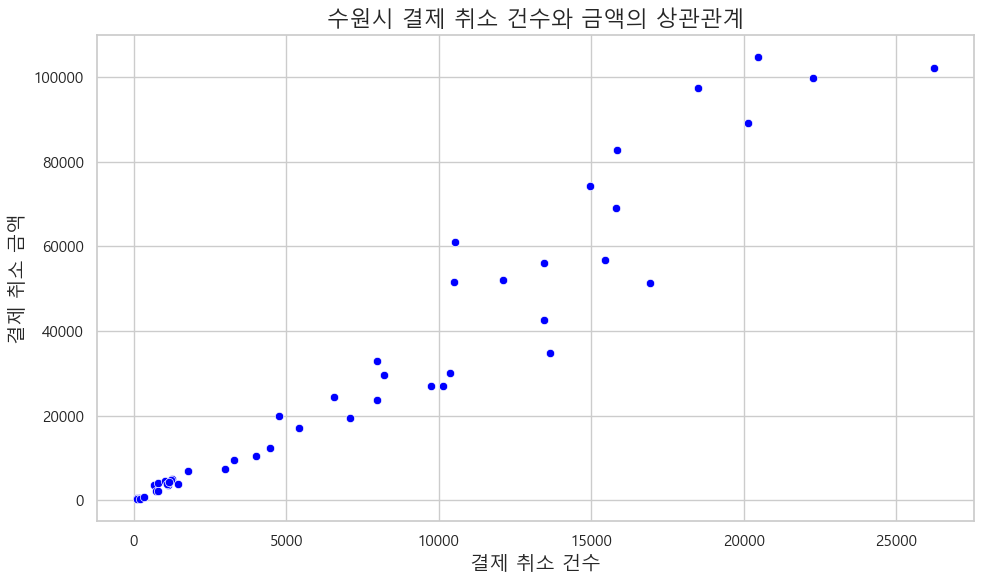

In [631]:
# '수원시' 지역만 필터링
suwon_data = df1[df1['시군명'] == '수원시']

# 산포도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='결제취소건수', y='결제취소금액', data=suwon_data, color='blue')

# 제목 및 레이블 설정
plt.title('수원시 결제 취소 건수와 금액의 상관관계', fontsize=16)
plt.xlabel('결제 취소 건수', fontsize=14)
plt.ylabel('결제 취소 금액', fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

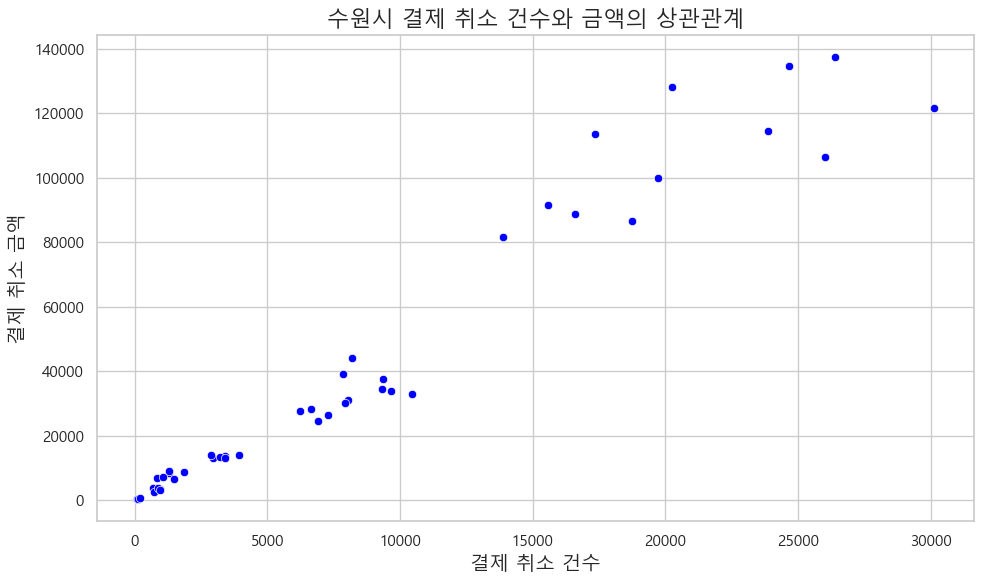

In [632]:
# '수원시' 지역만 필터링
suwon_data = df1[df1['시군명'] == '화성시']

# 산포도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='결제취소건수', y='결제취소금액', data=suwon_data, color='blue')

# 제목 및 레이블 설정
plt.title('수원시 결제 취소 건수와 금액의 상관관계', fontsize=16)
plt.xlabel('결제 취소 건수', fontsize=14)
plt.ylabel('결제 취소 금액', fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

결제취소와 동시에 결제취소 건수가 가장 높은편인 수원시와 화성시의 결제취소건수롸 결제금액의 상관관계를 도출해봄 -> 둘다 양의 상관관계라는 결과 도출

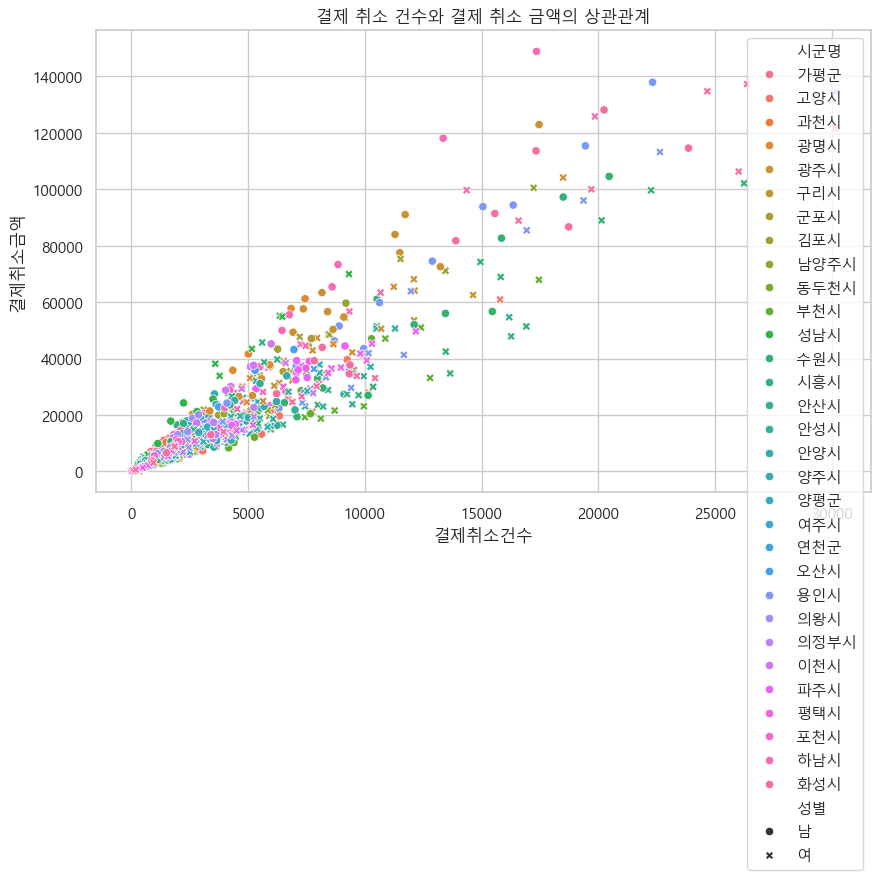

In [633]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='결제취소건수', y='결제취소금액', hue='시군명', style='성별')
plt.title('결제 취소 건수와 결제 취소 금액의 상관관계')
plt.show()

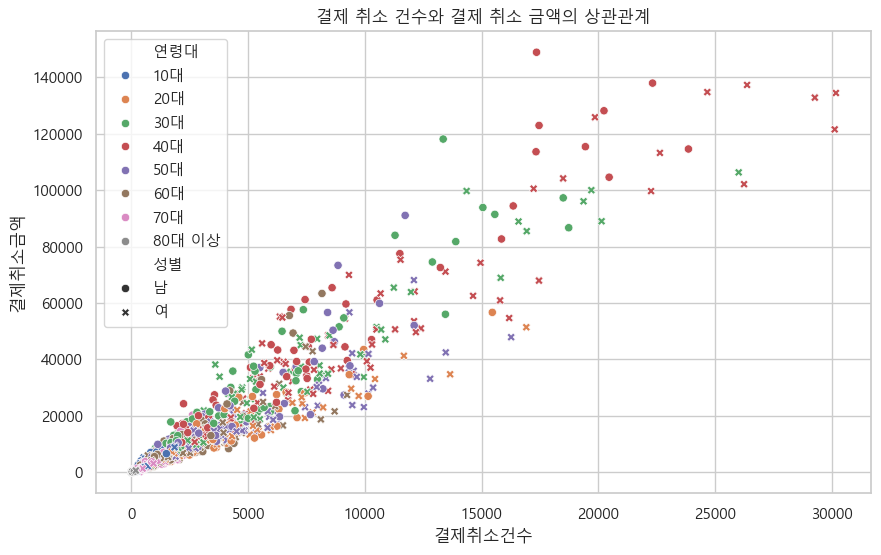

In [634]:
# 4. 결제 취소 건수와 결제 취소 금액의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='결제취소건수', y='결제취소금액', hue='연령대', style='성별')
plt.title('결제 취소 건수와 결제 취소 금액의 상관관계')
plt.show()

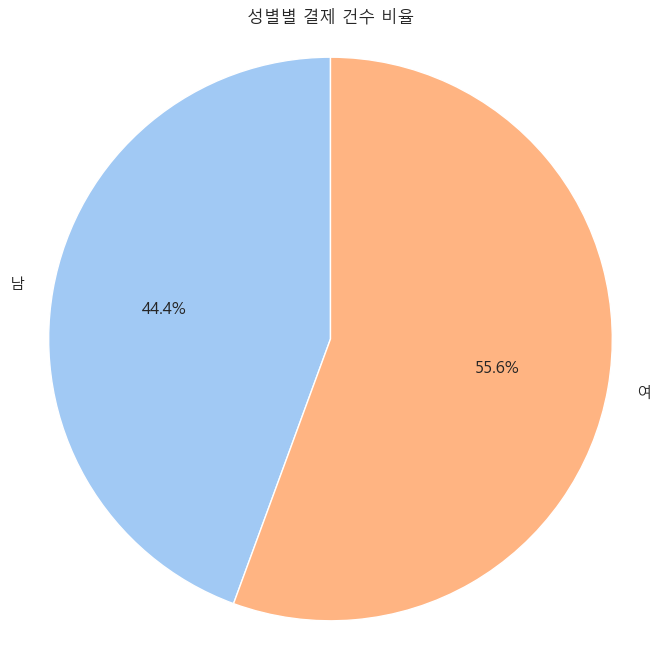

In [635]:
# 2. 성별별 결제 건수 비율
gender_counts = df1.groupby('성별')['결제건수'].sum()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,colors = sns.color_palette('pastel', len(gender_counts))
)
plt.title('성별별 결제 건수 비율')
plt.axis('equal')  # 원을 동그랗게 표현
plt.show()

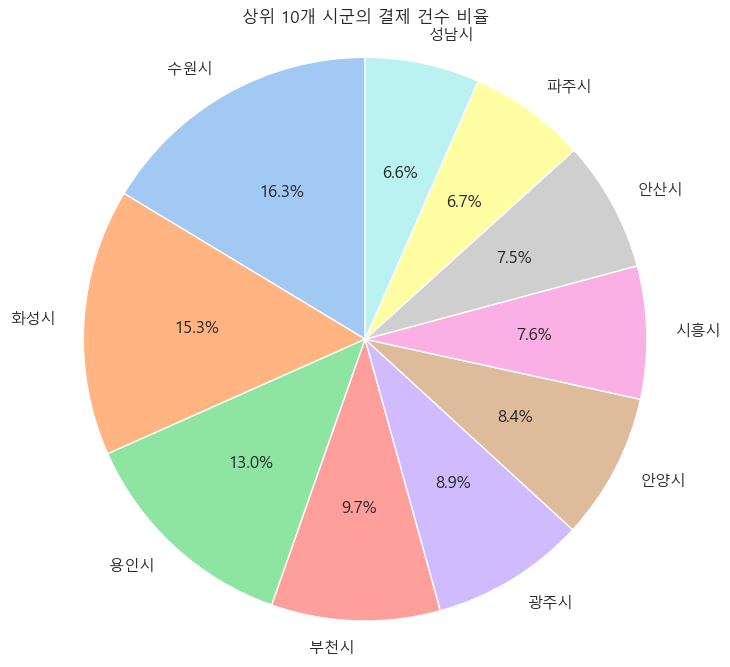

In [636]:
# 3. 시군명별 결제 건수 비율 (상위 10개)
top10_regions = df1.groupby('시군명')['결제건수'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top10_regions, labels=top10_regions.index, autopct='%1.1f%%', startangle=90,colors = sns.color_palette('pastel', len(top10_regions)))
plt.title('상위 10개 시군의 결제 건수 비율')
plt.axis('equal')
plt.show()